# AutoInteract demo

Toy interactive plotting and control using an arbitrary data source.

Autointeract might not actually save much code or time in this example! It's really built to handle more complicated types, but that would make for a confusing demo.

In [ ]:
using AutoInteract
using Plots
gr()

Some data that we can plot and interact with:

In [ ]:
mutable struct TestData
    noise1::Array{Float64}
    noise2::Array{Float64}
    show_sin::Bool
    sin_control::Float64
    does_nothing::Int
end

data = TestData(rand(100),rand(100), true, 2.0, 7)

Define a method to update and plot data, and anything else you want in the display loop:

In [ ]:
function plotit(data, signals, plot_signals)
    plots = []
    apply_signals!(data, signals)
    plottables = plot_all(data, plot_signals, 1:100)
    
    if signals[:show_sin] == true
        push!(plots, plot(sin.(1.0:0.1:10.0 * signals[:sin_control]), color=:red))
    end
    if plottables != nothing
        push!(plots, plottables)
    end
    plot(plots...)
end

Build widgets from data, and remove anything we dont want to display:

In [ ]:
widgets = make_widgets(data)
delete!(widgets, :does_nothing)

Make toggles for anything that can be plotted:

In [ ]:
plottables = make_plottables(data)

Get signals from all widgets and plottable toggles:

In [ ]:
interact_signals = get_signals(widgets)
plot_signals = get_signals(plottables)

Display interaction widgets and plot toggles, and plot interactives:

Interact.Box(Interact.Layout(Interact.Box(#= circular reference @-2 =#)), true, Interact.Widget[Interact.ToggleButton(18: "show_sin_toggle" = true Bool , "show_sin", true), Interact.Slider{Float64}(19: "sin_control_slider" = 2.0 Float64 , "sin_control", 2.0, 0.0:0.04:4.0, "horizontal", true, ".3f", true)])

Interact.Box(Interact.Layout(Interact.Box(#= circular reference @-2 =#)), true, Interact.Widget[Interact.ToggleButton(23: "noise1_toggle" = false Bool , "noise1", false), Interact.ToggleButton(24: "noise2_toggle" = false Bool , "noise2", false)])

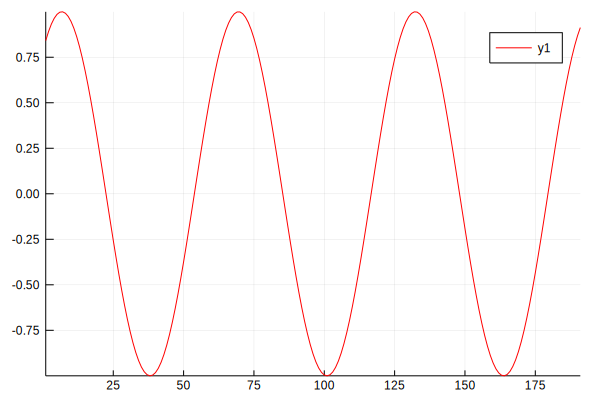

In [17]:
display(make_interface(widgets))
display(make_interface(plottables))

map((sw, sp) -> plotit(data, sw, sp), interact_signals, plot_signals)